# The K-Nearest Neighbors Algorithm
## Definition
The **$K$-nearest neighbors algorithm** (KNN) is a simple supervised machine learning algorithm that makes no mathematical assumptions, but assumes only that points that are close to one another are similar. Thus, the  prediction for each new point depends only on the points in closest proximity to it.

### Uses
The KNN algorithm is commonly used for:
* Classification
* Regression
* Search

### Advantages
* The algorithm is one of the simplest and easy to implement
* There are no mathematical assumptions 
* There's no need to build a model or tune several parameters
* The algorithm is versatile (several uses)

### Disadvantages
* Sensitivity to high dimension feature vectors can significantly slow the algorithm

---

## The KNN Algorithm
1. Load the data
1. Initialize $k$ to your chosen number of neighbors
1. For each example in the data
    1. Calculate the distance between the query example and the current example from the data.
    1. Add the distance and the index of the example to an ordered collection
1. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances 
1. Pick the first $K$ entries from the sorted collection
1. Get the labels of the selected $k$ entries
1. If regression, return the mean of the $K$ labels
1. If classification, return the mode of the $K$ labels

---

## The Model

### Iris Dataset
This example uses the `iris` dataset from `RDatasets`. The data is loaded as a `DataFrame` with columns:
* `SepalLength`
* `SepalWidth`
* `PetalLength`
* `PetalWidth`
* `Species`

The task is to build a model that can predict the species of an iris based on it's features (sepal length, sepal width, petal length, and petal width). 

---

In [1]:
# Import Packages
using RDatasets
using Plots
theme(:default)
using CSV
using Random

---

### Checking Assumptions

---

In [23]:
# Load iris data
iris = dataset("datasets", "iris")

# load features and labels
x_data = [x for x in zip(iris.SepalLength, iris.SepalWidth, iris.PetalLength)]
y_data = [iris.Species[i] for i = 1:150];

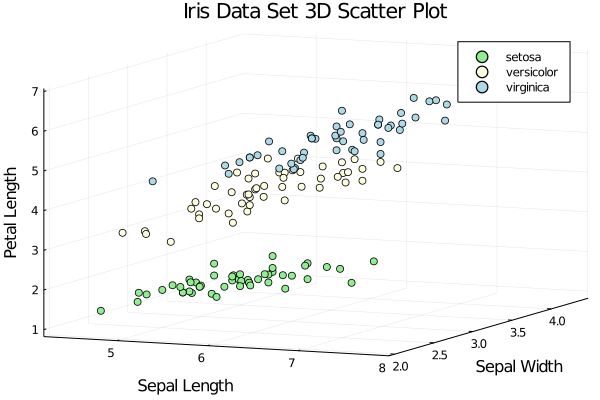

In [65]:
# Plot
scatter(xaxis = "Sepal Length",
        yaxis = "Sepal Width", 
        zaxis = "Petal Length",
        title = "Iris Data Set 3D Scatter Plot")
scatter!(x_data[1:50],
        label = "setosa",
        color = "lightgreen")
scatter!(x_data[51:100],
        label = "versicolor",
        color = "lightyellow")
scatter!(x_data[101:150],
        label = "virginica",
        color = "lightblue")

---

In the plot generated above, we can see that the iris species are, indeed, grouped together, satisfying the KNN algorithm assumption that similar points are close together. In order to predict a label, the KNN algorithm requires the calculation of distance between the points on the graph. 

To calculate distance, use the simple straight-line distance formula for Euclidiean distance, given by $$d(x^i, x^j) = \sqrt{\Sigma_{n=1}^l(x_n^i - x_n^j)^2}$$

---

In [67]:
""" Given points p1 and p2, calculate the Euclidean distance
"""
function distance(p1, p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

# Test the distance function 
print("The distance between ", x_data[1]," and ", x_data[50])
println(" is ", distance(x_data[1], x_data[50]))

The distance between (5.1, 3.5, 1.4) and (5.0, 3.3, 1.4) is 0.22360679774997896


### Split Data
The data $D$ will first be split into training and test sets based on a percentage of the dataset $p$ such that training data is $p\%$ of $D$ and test data is $(100-p)\%$ of $D$. 

The data will then be subdivided into points $X$ with labels $Y$ for each training and test set, i.e. $(X_{train}, Y_{train})$ and $(X_{test}, Y_{test})$.

In [6]:
""" Split data in a df into training and test fractions of train_prop and 1 - train_prop
"""
function split_data(df, train_prop = 0.7)
    n = nrow(df)
    index = shuffle(1:n)
    train_index = view(index, 1:floor(Int, train_prop*n))
    test_index = view(index, (floor(Int, train_prop*n)+1):n)
    
    return df[train_index,:], df[test_index,:]
end

# Test function
train, test = split_data(iris, 0.7)

(105×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species    
     │ Float64      Float64     Float64      Float64     Cat…       
─────┼──────────────────────────────────────────────────────────────
   1 │         6.6         2.9          4.6         1.3  versicolor
   2 │         7.2         3.2          6.0         1.8  virginica
   3 │         6.5         3.0          5.5         1.8  virginica
   4 │         6.1         2.9          4.7         1.4  versicolor
   5 │         6.2         2.9          4.3         1.3  versicolor
   6 │         4.6         3.2          1.4         0.2  setosa
   7 │         5.5         2.4          3.7         1.0  versicolor
   8 │         5.2         2.7          3.9         1.4  versicolor
   9 │         4.6         3.1          1.5         0.2  setosa
  10 │         4.9         3.6          1.4         0.1  setosa
  11 │         5.2         3.5          1.5         0.2  setosa
  ⋮  │      ⋮           ⋮            ⋮        

In [11]:
feat1 = "SepalLength"
x_train = [x for x in zip(train[1:nrow(train),feat1], train."SepalWidth"[1:nrow(train)], train."PetalLength"[1:nrow(train)])]


#y_train = [train."Species"[i] for i = 1:nrow(train)]
#x_test = [x for x in zip(test."SepalLength"[1:nrow(test)], test."SepalWidth"[1:nrow(test)], test."PetalLength"[1:nrow(test)])]
#y_test = [test."Species"[i] for i = 1:nrow(test)]

105-element Array{Tuple{Float64,Float64,Float64},1}:
 (6.6, 2.9, 4.6)
 (7.2, 3.2, 6.0)
 (6.5, 3.0, 5.5)
 (6.1, 2.9, 4.7)
 (6.2, 2.9, 4.3)
 (4.6, 3.2, 1.4)
 (5.5, 2.4, 3.7)
 (5.2, 2.7, 3.9)
 (4.6, 3.1, 1.5)
 (4.9, 3.6, 1.4)
 (5.2, 3.5, 1.5)
 (5.1, 3.3, 1.7)
 (5.4, 3.9, 1.7)
 ⋮
 (6.5, 3.0, 5.8)
 (5.6, 2.8, 4.9)
 (6.3, 2.7, 4.9)
 (5.8, 2.6, 4.0)
 (6.7, 3.1, 5.6)
 (5.1, 3.4, 1.5)
 (5.8, 2.7, 3.9)
 (6.4, 3.2, 4.5)
 (6.4, 2.8, 5.6)
 (6.3, 3.4, 5.6)
 (6.0, 3.0, 4.8)
 (5.0, 2.3, 3.3)

In [13]:
"""
Split training and test data from a df into proportions train_pop and 1-train_prop, 
then subdivide training and test into features (x) and labels (y) using 
feat1, feat2, feat3 and label as column names in df. 
Returns x_train, y_train, x_test, y_test datasets. 
"""
function train_test_split(df, train_prop, feat1, feat2, feat3, label)
    # Split the data into training and test sets
    train, test = split_data(df, train_prop)
    
    # Separate train/test into features (x) and labels (y) sets
    x_train = [x for x in zip(train[1:nrow(train), feat1], train[1:nrow(train), feat2], train[1:nrow(train), feat3])]
    y_train = [train[i, label] for i = 1:nrow(train)]
    x_test  = [x for x in zip(test[1:nrow(test), feat1], test[1:nrow(test), feat2], test[1:nrow(test), feat3])]
    y_test  = [test[i, label] for i = 1:nrow(test)]
    
    # Return data sets
    return x_train, y_train, x_test, y_test
end

x_train, y_train, x_test, y_test = train_test_split(iris, 0.7, "SepalLength", "SepalWidth", "PetalLength", "Species");

### Compute $K$-Nearest Neighbors

In [75]:
""" For a given point p, a collection of points X with labels Y, 
and a positive integer k, find the nearest neighbors to point p.
"""
function k_nearest_neighbors(p, X, Y, k)
    # Calculate the distance between p and all other points in X
    distance_array = [(X[i], Y[i], distance(p, X[i])) for i = 1:length(X)]
    
    # Sort the distance array in ascending order according to distance
    sort!(distance_array, by = x -> x[3])
    
    # Return the first k entries from the sorted distance array
    return distance_array[1:k]
end

# Test the k_nearest_neighbors function
test = k_nearest_neighbors(x_data[40], x_data, y_data, 4)

4-element Array{Tuple{Tuple{Float64,Float64,Float64},CategoricalArrays.CategoricalValue{String,UInt8},Float64},1}:
 ((5.1, 3.4, 1.5), "setosa", 0.0)
 ((5.0, 3.4, 1.5), "setosa", 0.09999999999999964)
 ((5.0, 3.4, 1.6), "setosa", 0.1414213562373093)
 ((5.1, 3.5, 1.4), "setosa", 0.14142135623730964)

In [83]:
"""This is specific to the iris dataset
"""
function KNN_iris_predictor(p, X, Y, k)
    neighbors = k_nearest_neighbors(p, X, Y, k)
    
    # get counts for each label/classification
    setosa_count = [1.0 for x in neighbors if x[2] == "setosa"]
    versicolor_count = [1.0 for x in neighbors if x[2] == "versicolor"]
    virginica_count = [1.0 for x in neighbors if x[2] == "virginica"]
    
    # find the max/majority
    temp_list = [("setosa", setosa_count),("versicolor", versicolor_count),("virginica", virginica_count)]
    sort!(temp_list, by = x -> x[2])
    
    return temp_list[end][1]
end

# test function 
KNN_iris_predictor(x_data[120], x_data, y_data, 5)

"virginica"

how to find the best k? 
now I need to go back and split into training and test data.. maybe 40/50 species to train and 10/50 species to test. calculate error on test - k with least error gives best k. use classification error to measure error. 

gonna make a movie predictor that takes in a movie name and recommends a movie that you might like based on similarity 

Movies example

In [2]:
movies = CSV.read("movies_recommendation_data.csv", DataFrame)

,MovieID,MovieName,IMDBRating,Biography,Drama,Thriller
,Int64,String,Float64,Int64,Int64,Int64
1,58,The Imitation Game,8.0,1,1,1
2,8,Ex Machina,7.7,0,1,0
3,46,A Beautiful Mind,8.2,1,1,0
4,62,Good Will Hunting,8.3,0,1,0
5,97,Forrest Gump,8.8,0,1,0
6,98,21,6.8,0,1,0
7,31,Gifted,7.6,0,1,0
8,3,Travelling Salesman,5.9,0,1,0
9,51,Avatar,7.9,0,0,0


In [89]:
x_movie_data = [x for x in zip(movies.IMDBRating, movies.Biography, movies.Drama, movies.Thriller)]
y_movie_data = [y for y in movies.MovieName];

In [100]:
function more_like_this(movie_name, features, labels, k)
    for i = 1:length(labels)
        if labels[i] == movie_name
            neighbors = k_nearest_neighbors(features[i], features, labels, k+1)
            println("The top $k similar movies with $movie_name are:")
            for j = 2:k+1
                println("$(j-1). ", neighbors[j][2])
            end
        end
    end
end


more_like_this (generic function with 1 method)

In [101]:
more_like_this("The Terminator", x_movie_data, y_movie_data, 7)

The top 7 similar movies with The Terminator are:
1. Avatar
2. The Avengers
3. Thor: Ragnarok
4. Black Panther
5. Spirited Away
6. The Fountain
7. 21 Jump Street


@book{book:2901220,
   title =     {Data Science from Scratch: First Principles with Python},
   author =    {Joel Grus},
   publisher = {O'Reilly Media},
   isbn =      {1492041130,9781492041139},
   year =      {2019},
   series =    {},
   edition =   {2},
   volume =    {},
   url =       {http://gen.lib.rus.ec/book/index.php?md5=9CCFB07574F0A75A429077D1B4FE984D}
}

def fizzbuzz_accuracy(low: int, hi: int, net: Layer) -> float:
num_correct = 0
for n in range(low, hi):
x = binary_encode(n)
predicted = argmax(net.forward(x))
actual = argmax(fizz_buzz_encode(n))
if predicted == actual:
num_correct += 1
return num_correct / (hi - low)